In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [13]:
data = pd.read_csv('../data/train.csv')
# test = pd.read_csv('../data/test.csv')
feats = pd.read_csv('../data/features.csv')
stores = pd.read_csv('../data/stores.csv')


In [14]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [15]:
data.Date = pd.to_datetime(data.Date)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [17]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [18]:
feats.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [19]:
feats.Date = pd.to_datetime(feats.Date)

In [20]:
data = data.drop(columns='IsHoliday').merge(feats, how='left', on=['Store','Date'])

In [21]:
data.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [22]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [23]:
data = data.merge(stores, how='left', on=['Store'])


In [24]:
data.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [25]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [19]:
ts = data.set_index('Date')['Weekly_Sales'].resample('1W').sum()

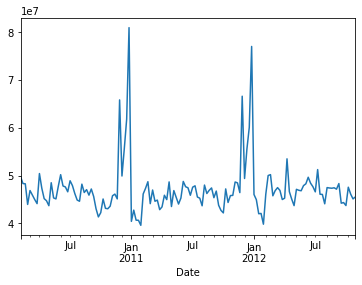

In [20]:
fig, ax = plt.subplots()
ts.plot(ax=ax);

In [26]:
data['Month'] = data['Date'].dt.month
# data['WeekOfYear'] = data['Date'].dt.weekofyear
# data['Quarter'] = data['Date'].dt.quarter


In [22]:
data.head(20)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Month,WeekOfYear,Quarter
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,5,1
1,1,1,2010-02-12,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,2,6,1
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,2,7,1
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,2,8,1
4,1,1,2010-03-05,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,3,9,1
5,1,1,2010-03-12,21043.39,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315,3,10,1
6,1,1,2010-03-19,22136.64,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315,3,11,1
7,1,1,2010-03-26,26229.21,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315,3,12,1
8,1,1,2010-04-02,57258.43,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315,4,13,2
9,1,1,2010-04-09,42960.91,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315,4,14,2


In [23]:
np.unique(data[['Store','Dept']], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81,
        82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([16679, 16673, 15471, 16707, 15346, 16197, 16197, 16330, 15221,
        16750, 16496, 16114, 16909, 16475,  9901, 15878, 16276, 14888,
        14267, 16246, 16017, 15231, 15824, 15634, 16158, 15593, 15844,
        16237, 14763, 12447, 16209, 16158, 11877, 15550, 14825, 11517,
         9783, 13797,  9894, 16452, 15481, 13354,  6763, 12640, 11573,
         6435,   646,  1742,  4482,  1562,  1394,  6268,  4767,  5596,
         5872,  4390,  6106,  5772,   143,  6435,  5309,  6046,  6430,
          150,   235,  6435,  5891,  6435,  6435,  5908,  6055,  6391,
         6435,  6435,  6435,  5913,  5685,  6435,  4854,  6278

In [24]:
len(np.unique(data['Dept']))

81

In [25]:
len(np.unique(data['Store']))

45

In [26]:
data.groupby(['Store','Dept'])['Date'].count()

Store  Dept
1      1       143
       2       143
       3       143
       4       143
       5       143
              ... 
45     94      134
       95      143
       96        2
       97      143
       98      135
Name: Date, Length: 3331, dtype: int64

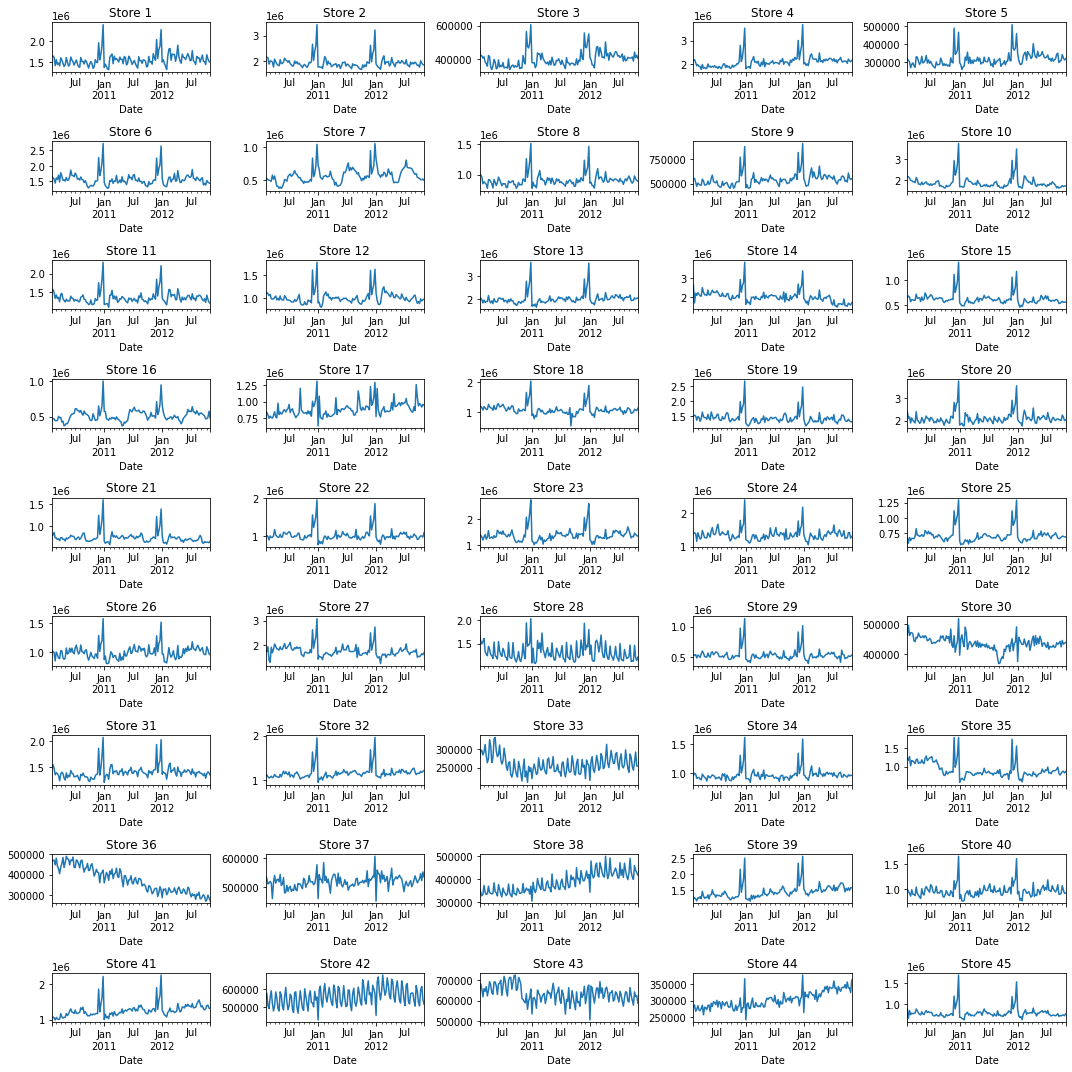

In [27]:
store_arr = np.unique(data['Store'])

fig, axs = plt.subplots(9,5, figsize=(15,15))

for store, ax in zip(store_arr, axs.flatten()):
    df = data[data['Store'] == store].copy()
    ts = df.set_index('Date')['Weekly_Sales'].resample('1W').sum()
    ts.plot(ax=ax)
    ax.set_title(f'Store {store}')
plt.tight_layout()

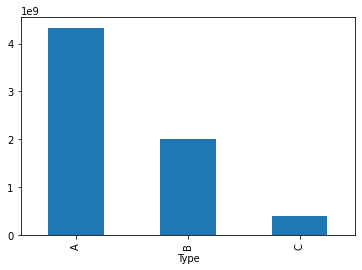

In [28]:
data.groupby(['Type'])['Weekly_Sales'].sum().plot(kind='bar');

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     150681 non-null  float64       
 7   MarkDown2     111248 non-null  float64       
 8   MarkDown3     137091 non-null  float64       
 9   MarkDown4     134967 non-null  float64       
 10  MarkDown5     151432 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  Type          421570 non-null  object        
 15  Size          421

In [30]:
# pd.plotting.scatter_matrix(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
#                                   'Size', 'Dept', 'Store', 'Month', 'WeekOfYear', 'Quarter']], figsize=(15,15));



In [31]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size', 'Month', 'WeekOfYear',
       'Quarter'],
      dtype='object')

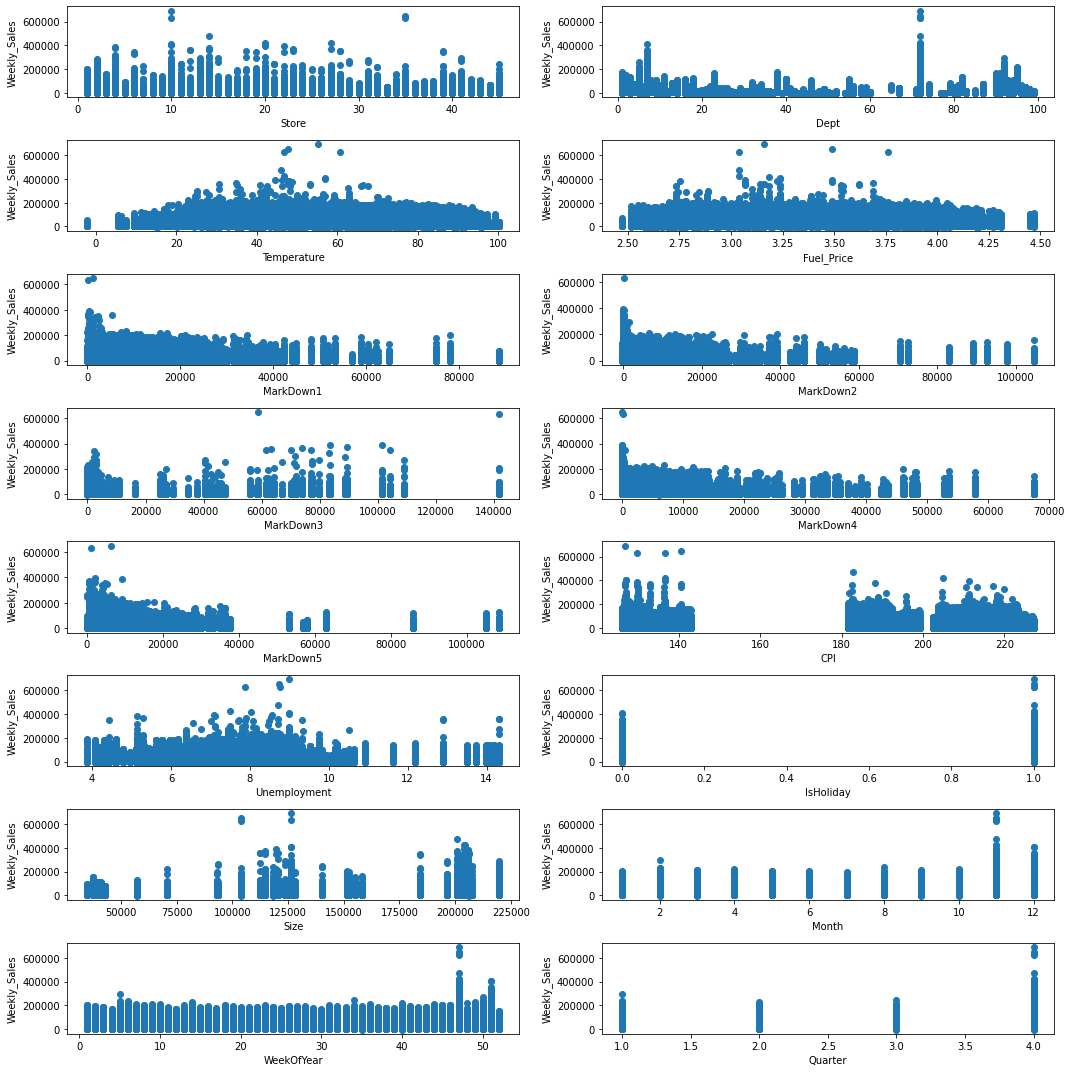

In [32]:
cols = ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Size', 'Month', 'WeekOfYear',
       'Quarter']

fig, axs = plt.subplots(8,2, figsize=(15,15))

for c, ax in zip(cols, axs.flatten()):
    ax.scatter(data[c], data['Weekly_Sales'])
    ax.set_ylabel('Weekly_Sales')
    ax.set_xlabel(c)
plt.tight_layout()

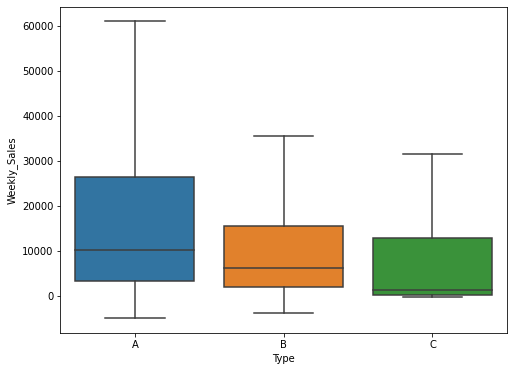

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=data, showfliers=False, ax=ax);

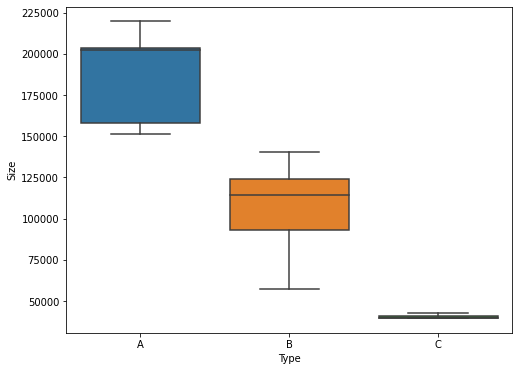

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Type', y='Size', data=data, showfliers=False, ax=ax);

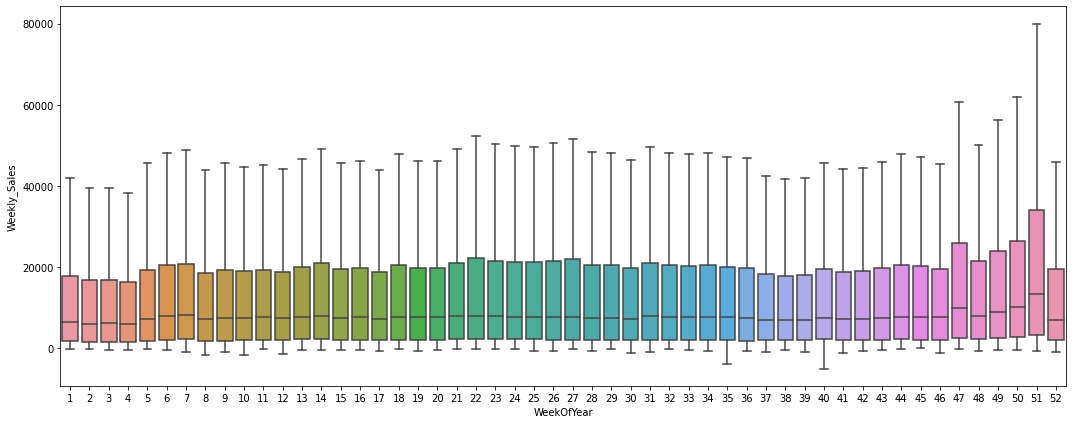

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='WeekOfYear', y='Weekly_Sales', data=data, showfliers=False, ax=ax)
plt.tight_layout();

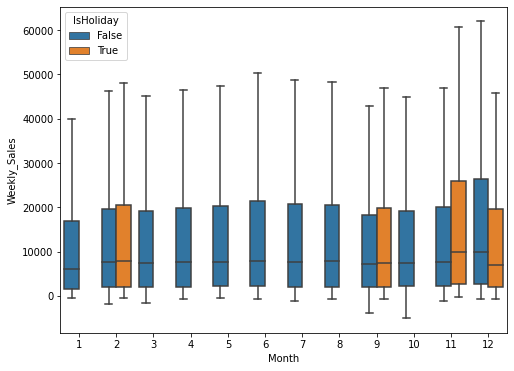

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Month', y='Weekly_Sales', hue='IsHoliday', data=data, showfliers=False, ax=ax);

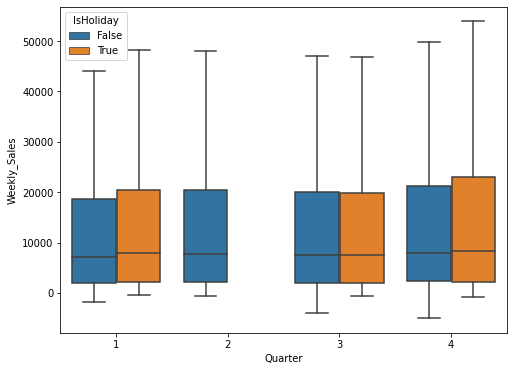

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Quarter', y='Weekly_Sales', hue='IsHoliday', data=data, showfliers=False, ax=ax);

In [38]:
data.groupby('Type')['Weekly_Sales'].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     150681 non-null  float64       
 7   MarkDown2     111248 non-null  float64       
 8   MarkDown3     137091 non-null  float64       
 9   MarkDown4     134967 non-null  float64       
 10  MarkDown5     151432 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  Type          421570 non-null  object        
 15  Size          421

In [28]:
data.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], 
           inplace=True)


In [41]:
data.head(10)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Month
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,A,151315,2
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True,A,151315,2
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False,A,151315,2
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False,A,151315,2
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False,A,151315,3
5,1,1,2010-03-12,21043.39,57.79,2.667,211.380643,8.106,False,A,151315,3
6,1,1,2010-03-19,22136.64,54.58,2.720,211.215635,8.106,False,A,151315,3
7,1,1,2010-03-26,26229.21,51.45,2.732,211.018042,8.106,False,A,151315,3
8,1,1,2010-04-02,57258.43,62.27,2.719,210.820450,7.808,False,A,151315,4
9,1,1,2010-04-09,42960.91,65.86,2.770,210.622857,7.808,False,A,151315,4


In [29]:
data = data.astype({'Store': 'object', 'Dept': 'object', 'Type': 'object', 'Month': 'object'})

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  object        
 1   Dept          421570 non-null  object        
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   CPI           421570 non-null  float64       
 7   Unemployment  421570 non-null  float64       
 8   IsHoliday     421570 non-null  bool          
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
 11  Month         421570 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 39.0+ MB


In [31]:
def combine_cols(row):
    return str(row[0]) + '-' + str(row[1])

In [32]:
data['Store_Dept'] = data[['Store','Dept']].apply(lambda row: combine_cols(row), axis=1)

In [33]:
data['Store_Dept'].unique().shape

(3331,)

In [ ]:
#take 20% to test out train on the rest


In [48]:
.2*3331

666.2

In [34]:
store_dept_list = data['Store_Dept'].unique()
len_ = len(store_dept_list)
random_lst = np.random.choice(store_dept_list,3331, replace=False)
train_sds, test_sds = random_lst[:int(len_ * 0.8)], random_lst[int(len_ * 0.8):]

In [42]:
mask = data['Store_Dept'].isin(train_sds)
train, test = data[mask], data[~mask]

In [43]:
train

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Month,Store_Dept
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,A,151315,2,1-1
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True,A,151315,2,1-1
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False,A,151315,2,1-1
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False,A,151315,2,1-1
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False,A,151315,3,1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,64.88,3.997,192.013558,8.684,False,B,118221,9,45-98
421566,45,98,2012-10-05,628.10,64.89,3.985,192.170412,8.667,False,B,118221,10,45-98
421567,45,98,2012-10-12,1061.02,54.47,4.000,192.327265,8.667,False,B,118221,10,45-98
421568,45,98,2012-10-19,760.01,56.47,3.969,192.330854,8.667,False,B,118221,10,45-98


In [44]:
test

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Month,Store_Dept
286,1,3,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,False,A,151315,2,1-3
287,1,3,2010-02-12,10887.84,38.51,2.548,211.242170,8.106,True,A,151315,2,1-3
288,1,3,2010-02-19,11523.47,39.93,2.514,211.289143,8.106,False,A,151315,2,1-3
289,1,3,2010-02-26,11135.17,46.63,2.561,211.319643,8.106,False,A,151315,2,1-3
290,1,3,2010-03-05,12275.58,46.50,2.625,211.350143,8.106,False,A,151315,3,1-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421142,45,94,2012-09-28,4734.83,64.88,3.997,192.013558,8.684,False,B,118221,9,45-94
421143,45,94,2012-10-05,3917.96,64.89,3.985,192.170412,8.667,False,B,118221,10,45-94
421144,45,94,2012-10-12,4041.28,54.47,4.000,192.327265,8.667,False,B,118221,10,45-94
421145,45,94,2012-10-19,4655.65,56.47,3.969,192.330854,8.667,False,B,118221,10,45-94


In [47]:
len(np.unique(train.Store_Dept))

2664

In [46]:
len(np.unique(test.Store_Dept))

667

In [49]:
cont_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Size']
disc_cols = ['Store', 'Dept', 'Type', 'Month']

transformers = [([cont_col], StandardScaler()) for cont_col in cont_cols]
encode_lst = [([disc_col], OneHotEncoder(sparse=False)) for disc_col in disc_cols]
transformers.extend(encode_lst)

mapper = DataFrameMapper(transformers, default=None, df_out=True)
train_scale = mapper.fit_transform(train)
test_scale = mapper.transform(test)

In [50]:
train_scale['Weekly_Sales'] = train_scale['Weekly_Sales'].astype('float')
test_scale['Weekly_Sales'] = test_scale['Weekly_Sales'].astype('float')

train_scale['IsHoliday'] = train_scale['IsHoliday'].astype('bool')
test_scale['IsHoliday'] = test_scale['IsHoliday'].astype('bool')



In [51]:
train_scale.to_csv('../data/train_clean.csv')
test_scale.to_csv('../data/test_clean.csv')